# Evaluation

In [1]:
import importnb
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score, classification_report

In [3]:
with importnb.Notebook():
    from Data_Cleanup import df_filtered
    from Training_ML_Models import X_test, y_test, y_pred_knn, y_pred_knn_tuned, y_pred_rf, y_pred_rf_tuned, y_pred_gb, y_pred_dt, y_pred_dt_tuned, model_knn, model_rf, model_dt, model_gb

df_filtered.head()

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Mother's qualification,Admission grade,Displaced,Debtor,Tuition fees up to date,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),GDP,Target
0,1,17,5,1,1,19,127.3,1,0,1,...,0,0,0,0.000000,0,0,0,0.000000,1.74,0
1,1,15,1,1,1,1,142.5,1,0,0,...,6,6,6,14.000000,6,6,6,13.666667,0.79,1
2,1,1,5,1,1,37,124.8,1,0,0,...,6,0,0,0.000000,6,0,0,0.000000,1.74,0
3,1,17,2,1,1,38,119.6,1,0,1,...,6,8,6,13.428571,6,10,5,12.400000,-3.12,1
4,2,39,1,0,1,37,141.5,0,0,1,...,6,9,5,12.333333,6,6,6,13.000000,0.79,1


## 1. kNN

In [29]:
accurancy_model_knn= accuracy_score(y_test, y_pred_knn)
precision_model_knn = precision_score(y_test, y_pred_knn)
recall_model_knn = recall_score(y_test, y_pred_knn)
f1_score_knn = f1_score(y_test, y_pred_knn)

print("Accuracy kNN: ", accurancy_model_knn)
print("Precision kNN: ", precision_model_knn)
print("Recall Score kNN: ", recall_model_knn)
print("F1 Score kNN: ", f1_score_knn)

Accuracy kNN:  0.8668503213957759
Precision kNN:  0.8524137931034482
Recall Score kNN:  0.9420731707317073
F1 Score kNN:  0.8950036205648081


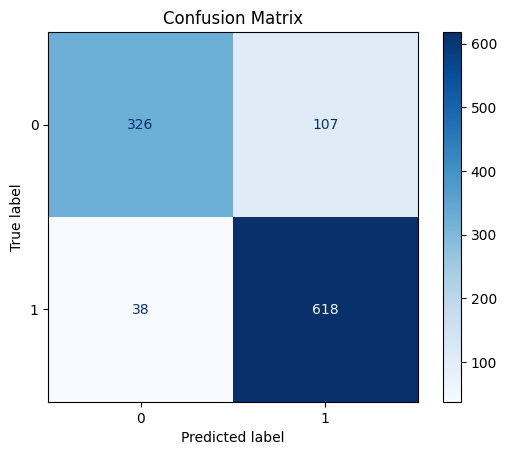

In [30]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

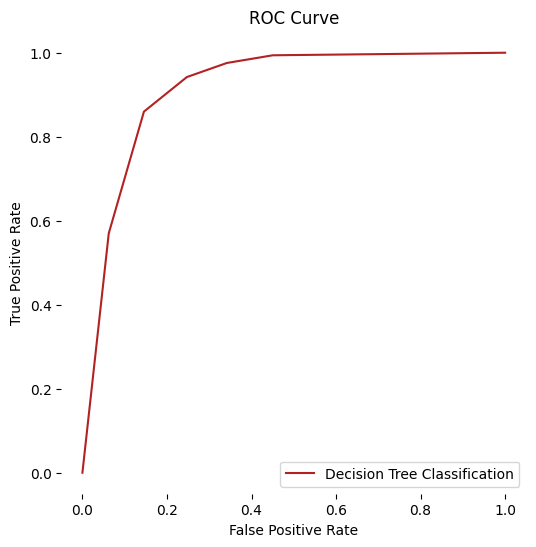

In [17]:
y_pred_probabiblity_knn = model_knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity_knn)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

In [31]:
accurancy_model_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)
precision_model_knn_tuned = precision_score(y_test, y_pred_knn_tuned)
recall_model_knn_tuned = recall_score(y_test, y_pred_knn_tuned)
f1_score_knn_tuned = f1_score(y_test, y_pred_knn_tuned)

print("Accuracy kNN (tuned): ", accurancy_model_knn_tuned)
print("Precision kNN (tuned): ", precision_model_knn_tuned)
print("Recall Score kNN (tuned): ", recall_model_knn_tuned)
print("F1 Score kNN (tuned): ", f1_score_knn_tuned)

Accuracy kNN (tuned):  0.8870523415977961
Precision kNN (tuned):  0.8596491228070176
Recall Score kNN (tuned):  0.9710365853658537
F1 Score kNN (tuned):  0.9119541875447388


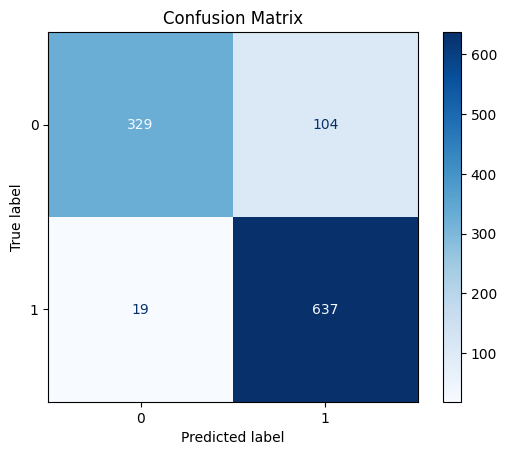

In [32]:
conf_matrix_knn_tuned = confusion_matrix(y_test, y_pred_knn_tuned)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn_tuned).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## 2. Random Forest

In [18]:
accurancy_model_rf = accuracy_score(y_test, y_pred_rf)
precision_model_rf = precision_score(y_test, y_pred_rf)
recall_model_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)

print("Accuracy Random Forest: ", accurancy_model_rf)
print("Precision Score Random Forest: ", precision_model_rf)
print("Recall Score Random Forest: ", recall_model_rf)
print("F1 Score Random Forest: ", f1_score_rf)

Accuracy Random Forest:  0.9109274563820018
Precision Score Random Forest:  0.8975817923186344
Recall Score Random Forest:  0.961890243902439
F1 Score Random Forest:  0.9286239882266373


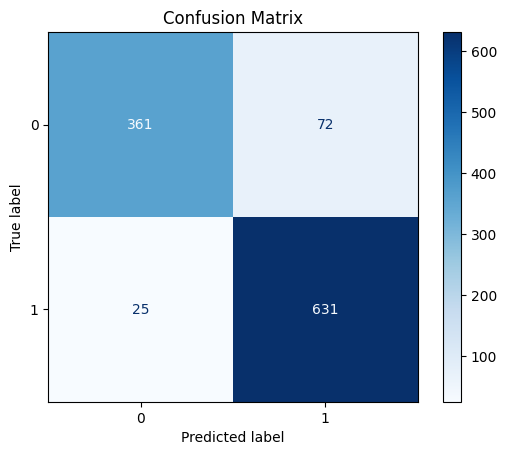

In [19]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

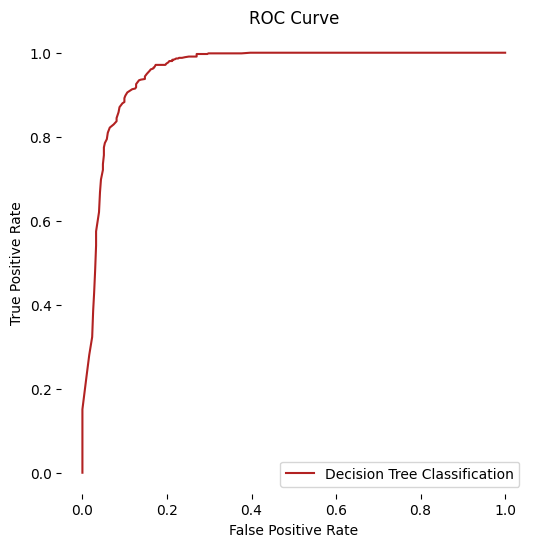

In [20]:
y_pred_probabiblity_rf = model_rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity_rf)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

In [33]:
accurancy_model_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
precision_model_rf_tuned = precision_score(y_test, y_pred_rf_tuned)
recall_model_rf_tuned = recall_score(y_test, y_pred_rf_tuned)
f1_score_rf_tuned = f1_score(y_test, y_pred_rf_tuned)

print("Accuracy Random Forest (tuned): ", accurancy_model_rf_tuned)
print("Precision Score Random Forest (tuned): ", precision_model_rf_tuned)
print("Recall Score Random Forest (tuned): ", recall_model_rf_tuned)
print("F1 Score Random Forest (tuned): ", f1_score_rf_tuned)

Accuracy Random Forest (tuned):  0.90633608815427
Precision Score Random Forest (tuned):  0.8901408450704226
Recall Score Random Forest (tuned):  0.9634146341463414
F1 Score Random Forest (tuned):  0.9253294289897511


# 3. Decision Trees

In [34]:
accurancy_model_dt = accuracy_score(y_test, y_pred_dt)
precision_model_dt = precision_score(y_test, y_pred_dt)
recall_model_dt = recall_score(y_test, y_pred_dt)
f1_score_dt = f1_score(y_test, y_pred_dt)

print("Accuracy Decision Tree: ", accurancy_model_dt)
print("Precision Score ecision Tree: ", precision_model_dt)
print("Recall Score ecision Tree ", recall_model_dt)
print("F1 Score ecision Tree: ", f1_score_dt)

Accuracy Decision Tree:  0.8530762167125804
Precision Score ecision Tree:  0.889937106918239
Recall Score ecision Tree  0.8628048780487805
F1 Score ecision Tree:  0.8761609907120743


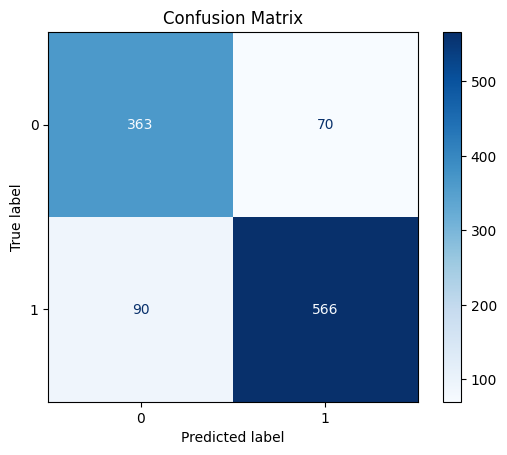

In [35]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(conf_matrix_dt, display_labels=model_dt.classes_).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

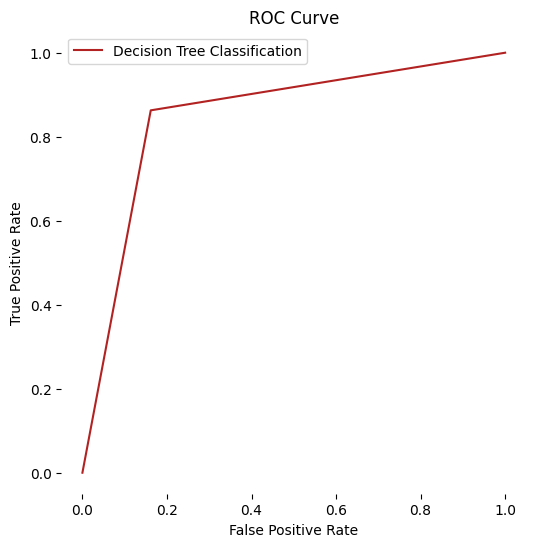

In [36]:
y_pred_probabiblity = model_dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

In [37]:
accurancy_model_dt_tuned = accuracy_score(y_test, y_pred_dt_tuned)
precision_model_dt_tuned = precision_score(y_test, y_pred_dt_tuned)
recall_model_dt_tuned = recall_score(y_test, y_pred_dt_tuned)
f1_score_dt_tuned = f1_score(y_test, y_pred_dt_tuned)

print("Accuracy Decision Tree (tuned): ", accurancy_model_dt_tuned)
print("Precision Score Decision Tree (tuned): ", precision_model_dt_tuned)
print("Recall Score Decision Tree (tuned): ", recall_model_dt_tuned)
print("F1 Score Decision Tree (tuned): ", f1_score_dt_tuned)

Accuracy Decision Tree (tuned):  0.9017447199265382
Precision Score ecision Tree (tuned):  0.884992987377279
Recall Score ecision Tree (tuned)  0.961890243902439
F1 Score ecision Tree (tuned):  0.9218407596785975


# 4. Naive Bayes

In [38]:
accuracy_model_gb = accuracy_score(y_test, y_pred_gb)
precision_model_gb = precision_score(y_test, y_pred_gb)
recall_model_gb = recall_score(y_test, y_pred_gb)
f1_model_gb = f1_score(y_test, y_pred_gb)

print("Accurancy Score Naive Bayes: ", accuracy_model_gb)
print("Precision Score Naive Bayes: ", precision_model_gb)
print("Recall Score Naive Bayes: ", recall_model_gb)
print("F1 Score Naive Bayes: ", f1_model_gb)

Accurancy Score Naive Bayes:  0.8475665748393021
Precision Score Naive Bayes:  0.85
Recall Score Naive Bayes:  0.9070121951219512
F1 Score Naive Bayes:  0.8775811209439528


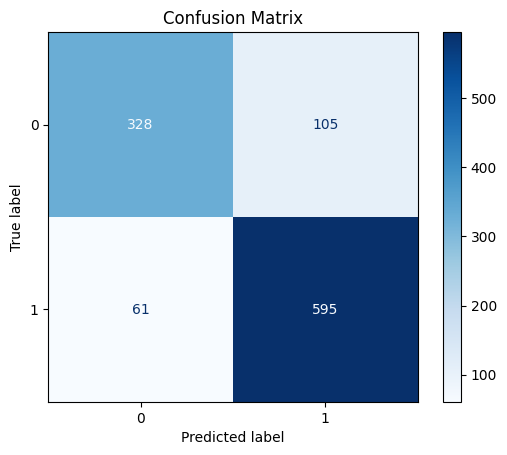

In [26]:
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gb).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

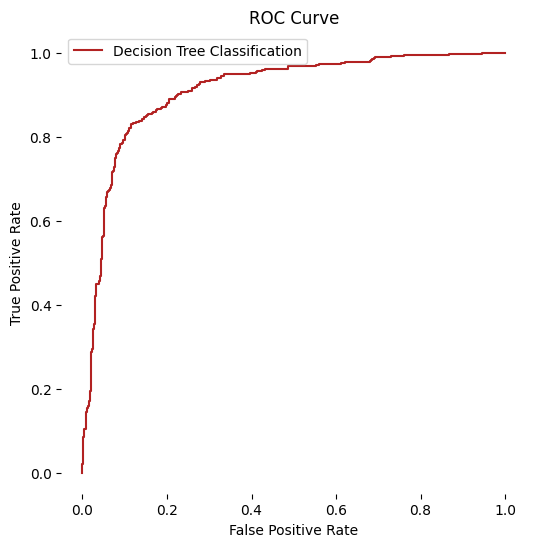

In [27]:
y_pred_probabiblity_gb = model_gb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity_gb)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()